<a href="https://colab.research.google.com/github/lucas-fpaiva/AnalisePred_I/blob/main/Projeto/car_eval/eda_car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Análise Exploratória dos dados


In [1]:
import pandas as pd
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns

from scipy.io.arff import loadarff 
from scipy.io import arff

from sklearn.model_selection import  StratifiedKFold

from ast import literal_eval

import warnings
warnings.filterwarnings('ignore')


In [2]:
def data_k_fold(data, k, tag, id_tag, features):
    kf=StratifiedKFold(n_splits=k, shuffle=True, random_state=123)
    kf.get_n_splits(data[tag].values)
    ids = np.array(data[id_tag])
    folds = pd.DataFrame([], columns=[id_tag, 'fold'])
    k=1
    
    for train_index, test_index in kf.split(data[features], data[tag]):
      fold = np.array([k]*len(test_index))
      folds = pd.concat([folds, pd.DataFrame(np.transpose([ids[test_index],fold]),columns=[id_tag, 'fold'])])
      k+=1

    data = data.merge(folds, how='left',on=id_tag)   
    return data

In [3]:
colors1 = [    
          (15/255,114/255,255/255,1), # blue
          (224/255,0/255,193/255,.88), #pink
          (1.0, 0.807843137254902, 0.0392156862745098, 1), #orange
          (0.95, 0, 0, 1), #red
          (0, 0.6666666666666666, 0.6274509803921569, 1), #green
          
          (0, 0.9764705882352941, 0, 0.5), #       
          (10/255,10/255, 130/255, 1), #(0.4, 0.0, 0.6, 1), # green
          (0.6, 0/255, 0.4, 0.8)#
        ]

colors2= [
          (0/255,0/255, 255/255, 1), # dark blue
          (0/255,161/255, 255/255, 1), # blue 
          (61/255,161/255,255/255,1), #light blue
          (124/255, 220/255,255/255,1), #light blue
          (0/255,240/255,255/255,1), #light blue
        ]



colors2= [
          (10/255,10/255, 130/255, 1), # light blue
          (10/255,10/255, 160/255, 1),
          (10/255,10/255, 190/255, 1),
          (10/255,10/255, 220/255, 1),
          (10/255,10/255, 250/255, 1), # dark blue
          
        ]

## Lendo o Dataset

In [ ]:
!git clone 'https://github.com/lucas-fpaiva/AnalisePred_I.git'

Cloning into 'AnalisePred_I'...
remote: Enumerating objects: 205, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 205 (delta 24), reused 0 (delta 0), pack-reused 148
Receiving objects: 100% (205/205), 5.80 MiB | 16.60 MiB/s, done.
Resolving deltas: 100% (70/70), done.


In [ ]:
data = loadarff('/content/AnalisePred_I/Projeto/car_eval/car-evaluation.arff')
data = pd.DataFrame(data[0])

# Convertendo os valores em bytes para int
for col in data.columns:
    data[col] = data[col].astype(int)

data['id'] = data.index
features = data.columns[1:-1]
data = data_k_fold(data, 5, 'class', 'id', features)


In [ ]:
data.to_csv("data_processed.csv")

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/lucas-fpaiva/AnalisePred_I/main/Projeto/car_eval/data_processed.csv', index_col=0)
features = data.columns[1:-2]

In [5]:
data.columns

Index(['class', 'buying_price_vhigh', 'buying_price_high', 'buying_price_med',
       'buying_price_low', 'maintenance_price_vhigh', 'maintenance_price_high',
       'maintenance_price_med', 'maintenance_price_low', 'doors_2', 'doors_3',
       'doors_4', 'doors_5more', 'persons_2', 'persons_4', 'persons_more',
       'luggage_boot_size_small', 'luggage_boot_size_med',
       'luggage_boot_size_big', 'safety_low', 'safety_med', 'safety_high',
       'id', 'fold'],
      dtype='object')

In [6]:
display(data)

,class,buying_price_vhigh,buying_price_high,buying_price_med,buying_price_low,maintenance_price_vhigh,maintenance_price_high,maintenance_price_med,maintenance_price_low,doors_2,...,persons_4,persons_more,luggage_boot_size_small,luggage_boot_size_med,luggage_boot_size_big,safety_low,safety_med,safety_high,id,fold
0,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,5
1,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,1,5
2,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,2,5
3,0,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,3,4
4,0,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,3,0,0,0,1,0,0,0,1,0,...,0,1,0,1,0,0,1,0,1723,4
1724,2,0,0,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,1,1724,1
1725,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,1,1,0,0,1725,5
1726,3,0,0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,1,0,1726,4


### Vizualização dos dados

No handles with labels found to put in legend.


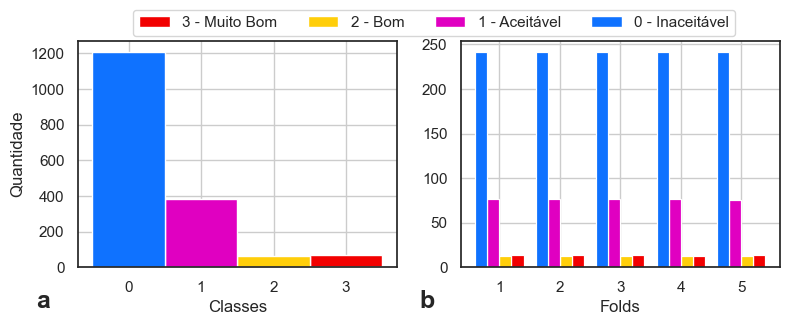

In [73]:
fig = plt.figure(figsize = (14,3),dpi=100)
axes = gridspec.GridSpec(nrows=1, ncols=3, figure=fig, wspace=0.2, hspace=0.1)

sns.set_theme(style="white", palette=None)

metrics = ['accuracy','auc','f1_score']
r = [0,0]
c = [0,1]
count=0

im = ['a','b']

ax = fig.add_subplot(axes[r[0],c[0]])
labels = ["3 - Muito Bom", "2 - Bom", "1 - Aceitável", "0 - Inaceitável"]
sns.histplot(data=data, x='class', hue='class', palette=colors1[0:4], discrete=True,alpha=1, ax=ax)
plt.legend(labels=labels,ncol=4, loc='upper left', bbox_to_anchor=(0.15, 1.17))
ax.set_xlabel('Classes')
ax.set_ylabel('Quantidade')
ax.grid()
ax.text(-0.13, -0.18, im[0], size=18, weight='bold', transform=ax.transAxes)

ax = fig.add_subplot(axes[r[1],c[1]])
sns.histplot(data=data, x='fold', hue='class', multiple="dodge", palette=colors1[0:4], discrete=True,alpha=1, ax=ax, shrink=0.8)
ax.text(-0.13, -0.18, im[1], size=18, weight='bold', transform=ax.transAxes)
ax.set_xlabel('Folds')
ax.set_ylabel('')
ax.grid()
ax.legend().remove()

plt.savefig('data.pdf', format="pdf", dpi=1000, bbox_inches="tight")

<AxesSubplot:xlabel='fold', ylabel='class'>

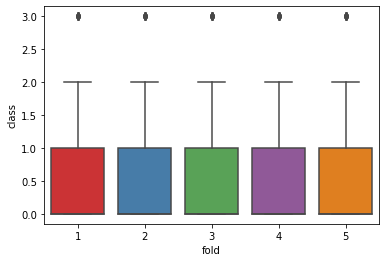

In [6]:
# Distribuição dos folds
sns.boxplot(data = data, y='class',x='fold',palette='Set1')

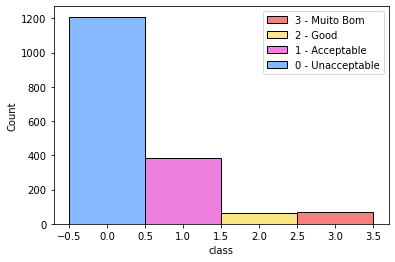

In [7]:
# Ocorrência por classe
labels = ["3 - Muito Bom", "2 - Good", "1 - Acceptable", "0 - Unacceptable"]
sns.histplot(data=data, x='class', hue='class', palette=colors1[0:4], discrete=True)
plt.legend(labels=labels)


In [29]:
data.count()

class                      1728
buying_price_vhigh         1728
buying_price_high          1728
buying_price_med           1728
buying_price_low           1728
maintenance_price_vhigh    1728
maintenance_price_high     1728
maintenance_price_med      1728
maintenance_price_low      1728
doors_2                    1728
doors_3                    1728
doors_4                    1728
doors_5more                1728
persons_2                  1728
persons_4                  1728
persons_more               1728
luggage_boot_size_small    1728
luggage_boot_size_med      1728
luggage_boot_size_big      1728
safety_low                 1728
safety_med                 1728
safety_high                1728
id                         1728
fold                       1728
dtype: int64

In [8]:
# Ocorrência por feature
for features in data.columns:
  print(features, data[data[features]==0][features].count())

class 1210
buying_price_vhigh 1296
buying_price_high 1296
buying_price_med 1296
buying_price_low 1296
maintenance_price_vhigh 1296
maintenance_price_high 1296
maintenance_price_med 1296
maintenance_price_low 1296
doors_2 1296
doors_3 1296
doors_4 1296
doors_5more 1296
persons_2 1152
persons_4 1152
persons_more 1152
luggage_boot_size_small 1152
luggage_boot_size_med 1152
luggage_boot_size_big 1152
safety_low 1152
safety_med 1152
safety_high 1152
id 1
fold 0


<AxesSubplot:>

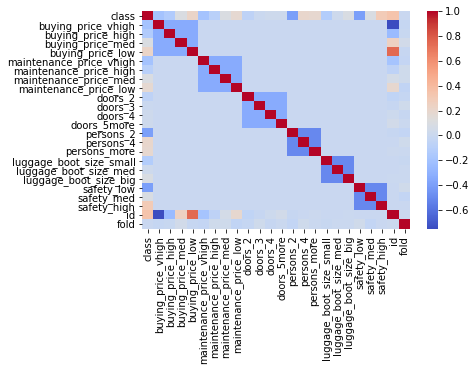

In [35]:


corr = data.corr()
sns.heatmap(corr,  xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap='coolwarm')

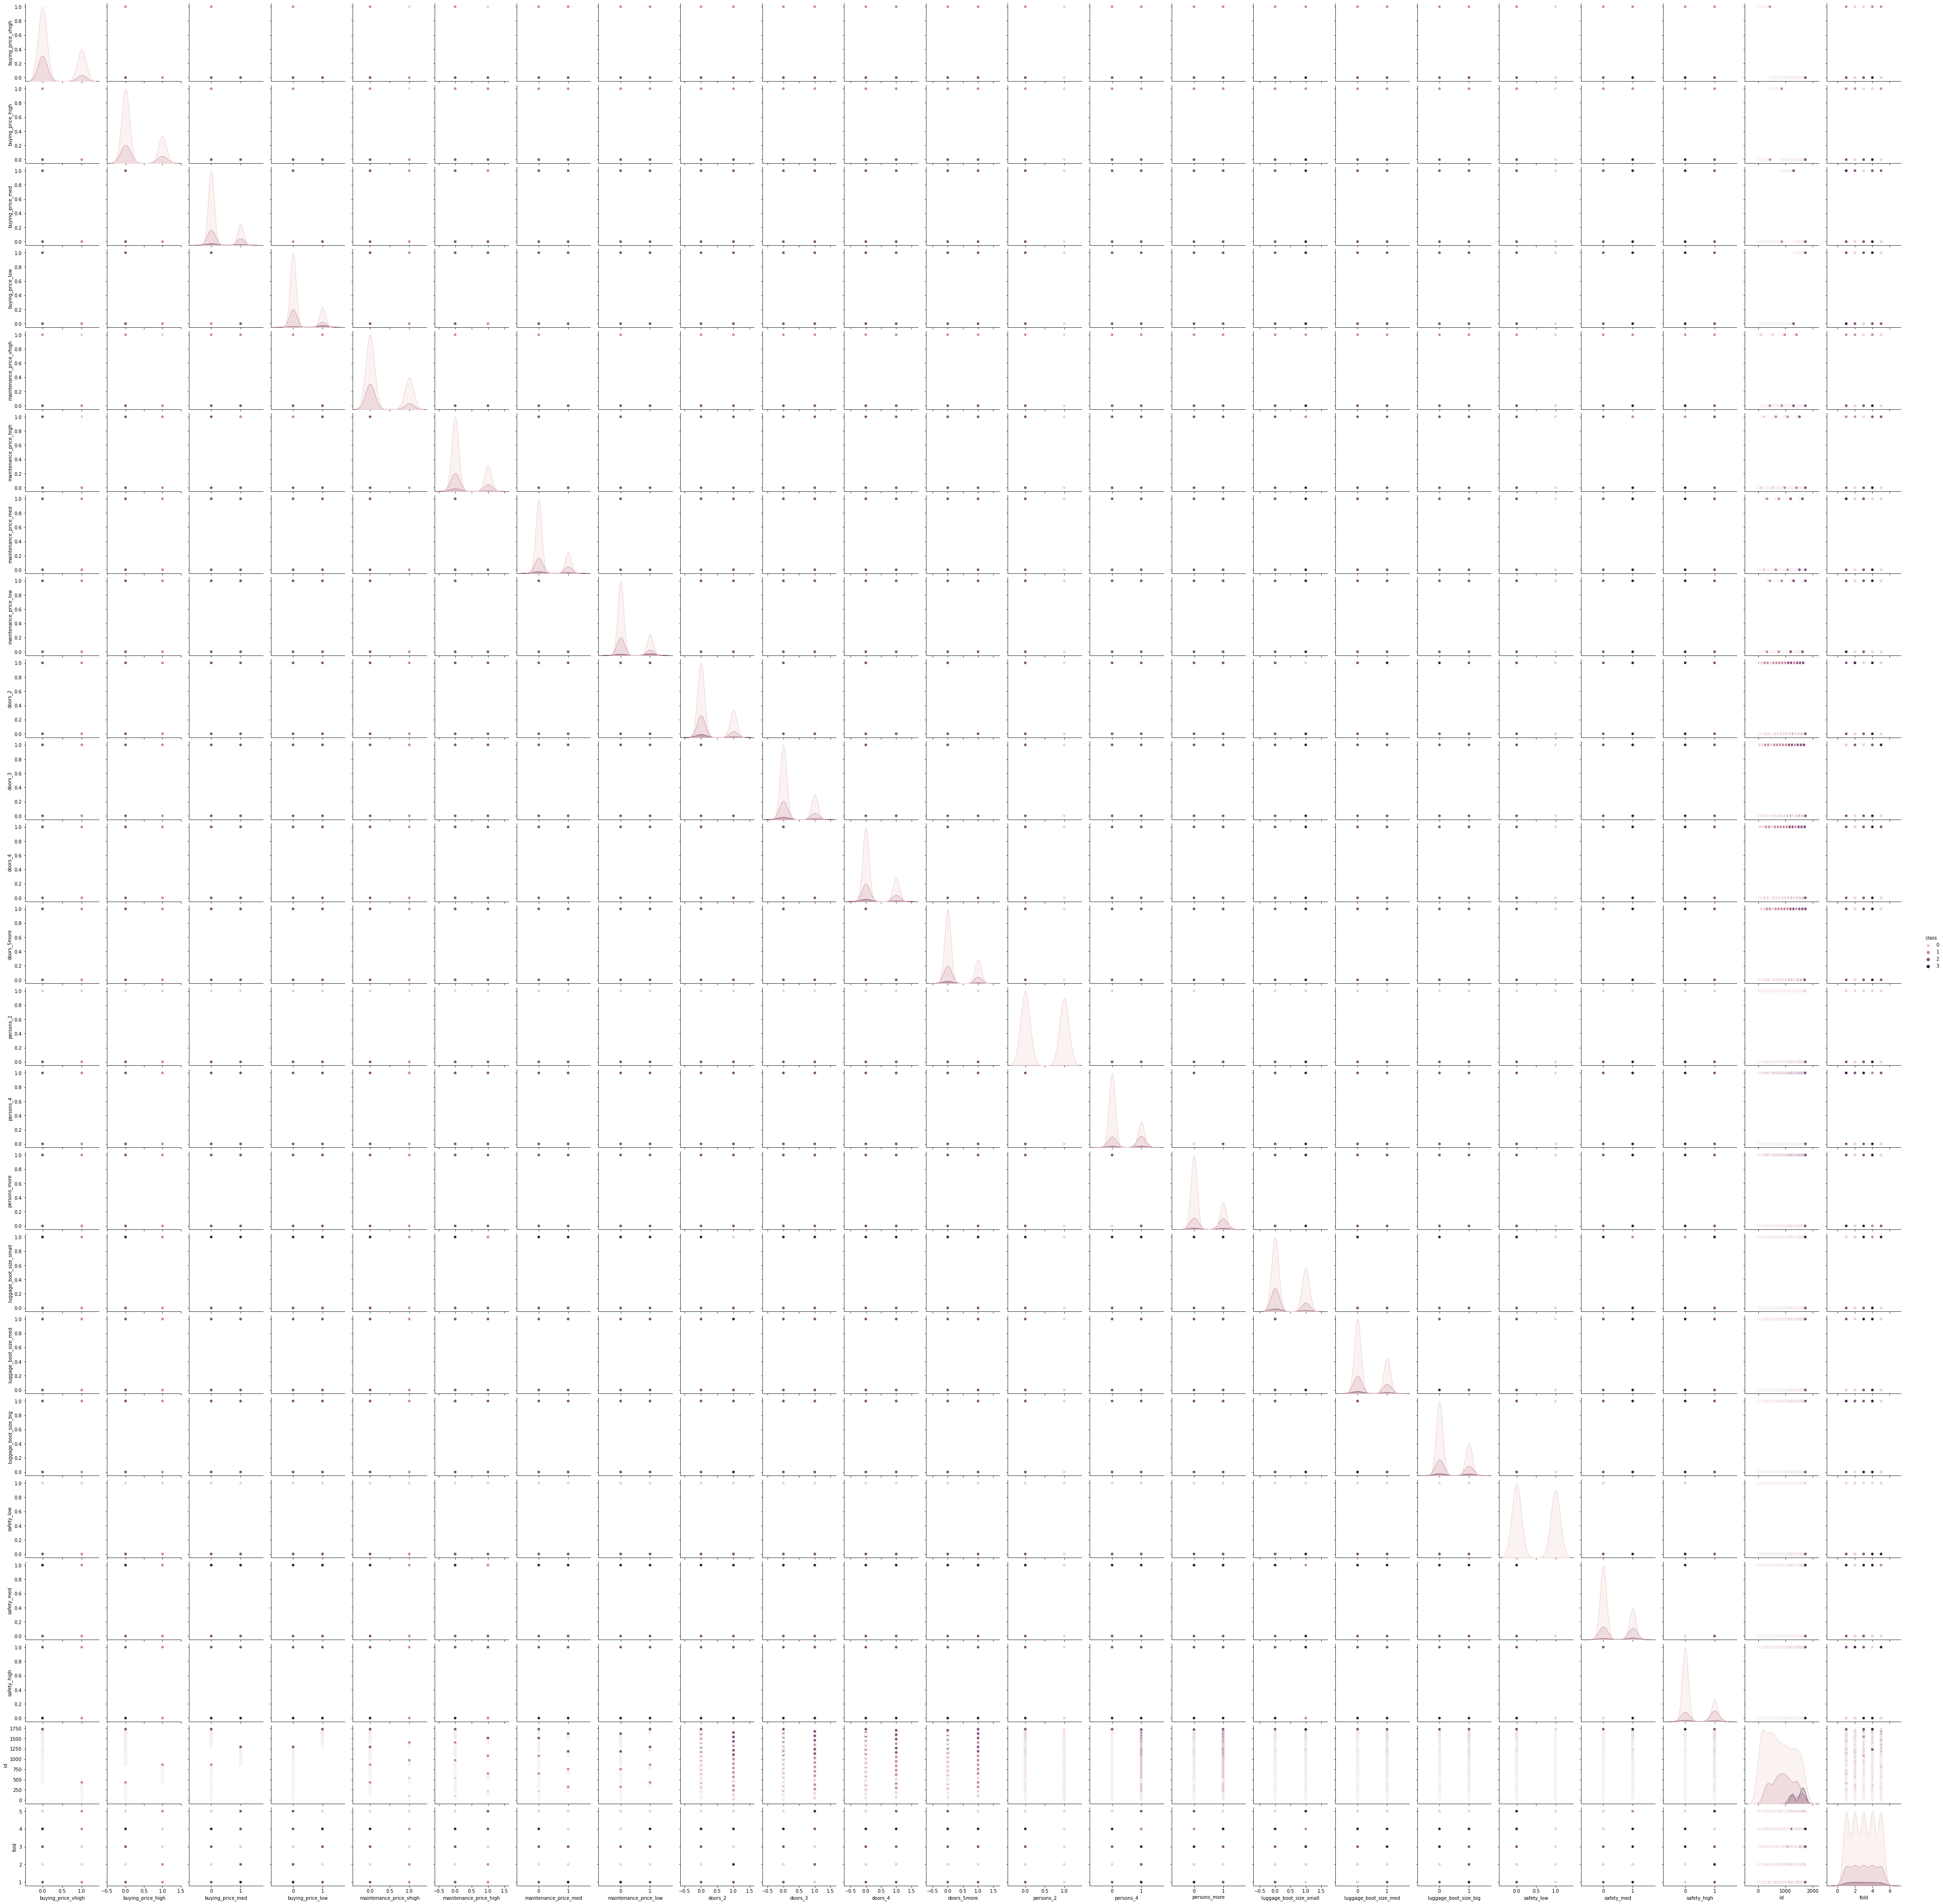

In [38]:
sns.pairplot(data,hue='class')